In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5178387


In [5]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5178387/sandbox’: File exists


In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5178387/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [10]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [12]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [9]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [50]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [51]:
traintest.num_dataset()

5

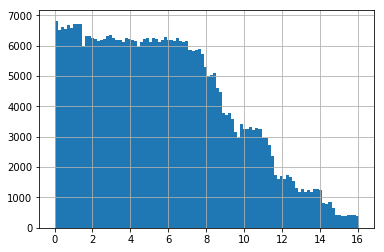

In [52]:
traintest.ydf.hist(bins=100);

In [53]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [54]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [55]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [56]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [57]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [58]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [59]:
qdf=qdf[~qdf['index'].isin({0,16,2,7,14,4})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((262596, 1), (262596, 100), (262596,))

In [60]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{1: 29606, 3: 22721, 5: 20661, 6: 18112, 8: 20285, 9: 24722, 10: 29316, 11: 28282, 12: 22648, 13: 21974, 15: 24269}'

In [61]:
quakes=set(qdf['index'])
quakes

{1, 3, 5, 6, 8, 9, 10, 11, 12, 13, 15}

In [62]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [63]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sum(delta*delta,1)
    aindex=np.argsort(delta) 
    return list(aindex[:n])
    

In [64]:
testX=testdf.values
testX.shape

(2624, 100)

In [65]:
trainX=datadf.values
trainX.shape, qdf.shape

((262596, 100), (262596, 1))

In [66]:
%%time
topidxs  = []
for testv in testX:
    a = topn(testv,3000,trainX)
    topidxs += a

CPU times: user 41min 23s, sys: 5min 37s, total: 47min
Wall time: 4min 16s


In [67]:
len(topidxs),len(set(topidxs)),len(testX),len(topidxs)/len(testX)

(7872000, 235270, 2624, 3000)

In [68]:
qdf.iloc[topidxs].head()

index
index                    
quake_10_o28006733     10
quake_06_o17988314      6
quake_10_o28002010     10
quake_06_o23373381      6
quake_06_o23373373      6

In [69]:
idxdf=pd.DataFrame(np.array(qdf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))

In [70]:
idxdf.shape

(3000, 2624)

In [71]:
idxdf.head()

0     1     2     3     4     5     6     7     8     9     ...  2614  \
0    10     1    13    10    15     9     6     8     9     6  ...    15   
1     6    15    13    10    15     9     6    10     5     6  ...    15   
2    10     1    13    10    15     9     6    13    10     6  ...    15   
3     6    15    13    10    15     9     6    10     3     6  ...    15   
4     6     1    13    10    15     9     6    13     9     6  ...    15   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0    10    10    15    15    11    15    15     8    15  
1    10    10    15    15    15    15    15     8    15  
2    10     1    15     1    11    15    15     8    15  
3    10    10    15     1     1    15    15     8     1  
4    10     1    15     1    12    15    15     8    15  

[5 rows x 2624 columns]

In [72]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:1000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.sort_index(ascending=False).cumsum(0)/len(testX),2))

1 3 5 6 8 9 10 11 12 13 15 


0                                                            
qno      1     3     5     6     8     9     10    11    12    13    15
index                                                                  
0.0    0.38  0.86  0.53  0.39  0.68  0.64  0.31  0.62  0.85  0.68  0.17
0.1    0.37  0.09  0.35  0.27  0.25  0.24  0.30  0.32  0.13  0.28  0.27
0.2    0.18  0.03  0.10  0.11  0.06  0.09  0.23  0.05  0.02  0.03  0.15
0.3    0.06  0.01  0.02  0.07  0.01  0.02  0.08  0.00  0.00  0.00  0.06
0.4    0.01  0.00  0.00  0.06   NaN  0.01  0.04  0.00   NaN   NaN  0.04
0.5    0.00  0.00   NaN  0.07   NaN  0.00  0.03   NaN   NaN   NaN  0.04
0.6    0.00   NaN   NaN  0.03   NaN   NaN  0.02   NaN   NaN   NaN  0.04
0.7     NaN   NaN   NaN  0.00   NaN   NaN  0.00   NaN   NaN   NaN  0.04
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.10

0                                                            
qno      1     3     5     6     8     9     10    11    12    13    15
index                                                                  
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.10
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.13
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.18
0.7     NaN   NaN   NaN  0.00   NaN   NaN  0.00   NaN   NaN   NaN  0.22
0.6    0.00   NaN   NaN  0.03   NaN   NaN  0.02   NaN   NaN   NaN  0.26
0.5    0.00  0.00   NaN  0.09   NaN  0.00  0.05   NaN   NaN   NaN  0.30
0.4    0.01  0.00  0.00  0.16   NaN  0.01  0.09  0.00   NaN   NaN  0.34
0.3    0.06  0.01  0.02  0.23  0.01  0.03  0.17  0.01  0.00  0.00  0.41
0.2    0.24  0.05  0.11  0.34  0.07  0.12  0.40  0.05  0.03  0.03  0.55
0.1    0.62  0.14  0.47  0.61  0.32  0.36  0.69  0.38  0.15  0.32  0.83
0.0    1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00

In [73]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:2000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))

1 3 5 6 8 9 10 11 12 13 15 


0                                                            
qno      1     3     5     6     8     9     10    11    12    13    15
index                                                                  
0.0    0.33  0.86  0.54  0.35  0.66  0.62  0.27  0.64  0.84  0.66  0.16
0.1    0.43  0.10  0.37  0.29  0.28  0.27  0.31  0.31  0.13  0.32  0.28
0.2    0.20  0.03  0.09  0.11  0.06  0.09  0.24  0.04  0.02  0.02  0.16
0.3    0.03  0.01  0.01  0.08  0.00  0.02  0.08  0.00  0.00  0.00  0.07
0.4    0.00  0.00   NaN  0.09   NaN  0.00  0.04  0.00   NaN   NaN  0.05
0.5     NaN   NaN   NaN  0.06   NaN   NaN  0.04   NaN   NaN   NaN  0.04
0.6     NaN   NaN   NaN  0.01   NaN   NaN  0.01   NaN   NaN   NaN  0.04
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.03
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.08

0                                                            
qno      1     3     5     6     8     9     10    11    12    13    15
index                                                                  
0.0    0.33  0.86  0.54  0.35  0.66  0.62  0.27  0.64  0.84  0.66  0.16
0.1    0.76  0.96  0.90  0.64  0.94  0.89  0.58  0.96  0.98  0.98  0.44
0.2    0.97  0.99  0.99  0.75  1.00  0.98  0.83  1.00  1.00  1.00  0.60
0.3    1.00  1.00  1.00  0.84  1.00  1.00  0.91  1.00  1.00  1.00  0.67
0.4    1.00  1.00   NaN  0.93   NaN  1.00  0.95  1.00   NaN   NaN  0.72
0.5     NaN   NaN   NaN  0.99   NaN   NaN  0.99   NaN   NaN   NaN  0.76
0.6     NaN   NaN   NaN  1.00   NaN   NaN  1.00   NaN   NaN   NaN  0.80
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.85
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.89
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.92
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.00

In [74]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:3000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))   

1 3 5 6 8 9 10 11 12 13 15 


0                                                            
qno      1     3     5     6     8     9     10    11    12    13    15
index                                                                  
0.0    0.28  0.86  0.53  0.32  0.65  0.62  0.24  0.63  0.85  0.65  0.14
0.1    0.51  0.10  0.38  0.30  0.30  0.28  0.35  0.33  0.13  0.33  0.30
0.2    0.19  0.03  0.08  0.13  0.05  0.09  0.24  0.03  0.02  0.02  0.16
0.3    0.03  0.00  0.00  0.09  0.00  0.01  0.08  0.00  0.00   NaN  0.07
0.4    0.00  0.00   NaN  0.11   NaN   NaN  0.05   NaN   NaN   NaN  0.06
0.5     NaN   NaN   NaN  0.05   NaN   NaN  0.04   NaN   NaN   NaN  0.05
0.6     NaN   NaN   NaN  0.00   NaN   NaN  0.00   NaN   NaN   NaN  0.05
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.03
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.06

0                                                            
qno      1     3     5     6     8     9     10    11    12    13    15
index                                                                  
0.0    0.28  0.86  0.53  0.32  0.65  0.62  0.24  0.63  0.85  0.65  0.14
0.1    0.79  0.96  0.91  0.62  0.94  0.90  0.59  0.96  0.98  0.98  0.44
0.2    0.97  1.00  1.00  0.75  1.00  0.99  0.83  1.00  1.00  1.00  0.60
0.3    1.00  1.00  1.00  0.84  1.00  1.00  0.91  1.00  1.00   NaN  0.67
0.4    1.00  1.00   NaN  0.95   NaN   NaN  0.96   NaN   NaN   NaN  0.73
0.5     NaN   NaN   NaN  1.00   NaN   NaN  1.00   NaN   NaN   NaN  0.78
0.6     NaN   NaN   NaN  1.00   NaN   NaN  1.00   NaN   NaN   NaN  0.83
0.7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.86
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.89
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.94
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.00

In [75]:
topquakes= qdf.iloc[topidxs]
topquakes['index'].value_counts().sort_index()

1      780776
3      163360
5      495362
6     1218246
8      358894
9      425947
10    1154649
11     358627
12     158152
13     319772
15    2438215
Name: index, dtype: int64

In [76]:
topquakes= qdf.iloc[list(set(topidxs))]
topquakes['index'].value_counts().sort_index()

1     27629
3     18302
5     20107
6     15272
8     18551
9     22255
10    28508
11    24187
12    17517
13    19062
15    23880
Name: index, dtype: int64

In [77]:
filtered_idx=list(set(topidxs))
qdf=qdf.iloc[filtered_idx]
datadf=datadf.iloc[filtered_idx]
ydf=ydf.iloc[filtered_idx]
qdf.shape,datadf.shape,ydf.shape

((235270, 1), (235270, 100), (235270,))

In [78]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [79]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [80]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  1 1 (nan, nan)
valid quake 3 train quake 1
(27629, 100) (27629,) (18302, 100) (18302,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07169	valid_1's l1: 1.75669
[100]	training's l1: 0.727795	valid_1's l1: 1.63602
[150]	training's l1: 0.565542	valid_1's l1: 1.61324
[200]	training's l1: 0.478158	valid_1's l1: 1.61297
[250]	training's l1: 0.429021	valid_1's l1: 1.61487
[300]	training's l1: 0.394654	valid_1's l1: 1.61755
[350]	training's l1: 0.368922	valid_1's l1: 1.61842
Early stopping, best iteration is:
[165]	training's l1: 0.533949	valid_1's l1: 1.61134
quake  1 3 (1.6113379154486411, 165)
valid quake 5 train quake 1
(27629, 100) (27629,) (20107, 100) (20107,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.07169	valid_1's l1: 2.80255
[100]	training's l1: 0.727795	valid_1's l1: 2.81898
[150]	training's l1: 0.565542	valid_1's l1: 2.84273
[200]	training's l1: 0.478158	valid_1's l1: 2.86051
Early stopping, 

[300]	training's l1: 0.193406	valid_1's l1: 2.3801
[350]	training's l1: 0.175285	valid_1's l1: 2.37939
[400]	training's l1: 0.164004	valid_1's l1: 2.37606
[450]	training's l1: 0.155868	valid_1's l1: 2.37281
[500]	training's l1: 0.149334	valid_1's l1: 2.37085
[550]	training's l1: 0.143822	valid_1's l1: 2.36922
[600]	training's l1: 0.139099	valid_1's l1: 2.36807
[650]	training's l1: 0.134993	valid_1's l1: 2.36759
[700]	training's l1: 0.131267	valid_1's l1: 2.36729
[750]	training's l1: 0.12788	valid_1's l1: 2.36724
[800]	training's l1: 0.124732	valid_1's l1: 2.36702
[850]	training's l1: 0.121953	valid_1's l1: 2.36753
[900]	training's l1: 0.119359	valid_1's l1: 2.36702
[950]	training's l1: 0.116945	valid_1's l1: 2.36706
Early stopping, best iteration is:
[781]	training's l1: 0.125897	valid_1's l1: 2.36677
quake  3 1 (2.366769638999229, 781)
quake  3 3 (nan, nan)
valid quake 5 train quake 3
(18302, 100) (18302,) (20107, 100) (20107,)
Training until validation scores don't improve for 200 ro

[1100]	training's l1: 0.110273	valid_1's l1: 0.833097
[1150]	training's l1: 0.10836	valid_1's l1: 0.832863
[1200]	training's l1: 0.106477	valid_1's l1: 0.832304
[1250]	training's l1: 0.1047	valid_1's l1: 0.832218
[1300]	training's l1: 0.102922	valid_1's l1: 0.831639
[1350]	training's l1: 0.101238	valid_1's l1: 0.831122
[1400]	training's l1: 0.0996593	valid_1's l1: 0.830888
[1450]	training's l1: 0.0981034	valid_1's l1: 0.830903
[1500]	training's l1: 0.0966218	valid_1's l1: 0.830679
quake  3 12 (0.8306787865216597, 0)
valid quake 13 train quake 3
(18302, 100) (18302,) (19062, 100) (19062,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.787665	valid_1's l1: 1.05431
[100]	training's l1: 0.502348	valid_1's l1: 1.01345
[150]	training's l1: 0.353757	valid_1's l1: 1.0128
[200]	training's l1: 0.270645	valid_1's l1: 1.02307
[250]	training's l1: 0.224611	valid_1's l1: 1.03069
[300]	training's l1: 0.193406	valid_1's l1: 1.03741
Early stopping, best iteration i

[100]	training's l1: 0.455217	valid_1's l1: 2.72075
[150]	training's l1: 0.323906	valid_1's l1: 2.70009
[200]	training's l1: 0.250516	valid_1's l1: 2.68774
[250]	training's l1: 0.210304	valid_1's l1: 2.6805
[300]	training's l1: 0.186999	valid_1's l1: 2.67574
[350]	training's l1: 0.170388	valid_1's l1: 2.67014
[400]	training's l1: 0.158684	valid_1's l1: 2.66713
[450]	training's l1: 0.149422	valid_1's l1: 2.6658
[500]	training's l1: 0.141893	valid_1's l1: 2.66459
[550]	training's l1: 0.135697	valid_1's l1: 2.66355
[600]	training's l1: 0.130554	valid_1's l1: 2.66317
[650]	training's l1: 0.126067	valid_1's l1: 2.66212
[700]	training's l1: 0.122059	valid_1's l1: 2.66146
[750]	training's l1: 0.118479	valid_1's l1: 2.66166
[800]	training's l1: 0.115158	valid_1's l1: 2.66204
[850]	training's l1: 0.112273	valid_1's l1: 2.66155
[900]	training's l1: 0.109562	valid_1's l1: 2.6609
[950]	training's l1: 0.107105	valid_1's l1: 2.6607
[1000]	training's l1: 0.104667	valid_1's l1: 2.66041
[1050]	training

[1250]	training's l1: 0.0948564	valid_1's l1: 2.70122
[1300]	training's l1: 0.093174	valid_1's l1: 2.70098
[1350]	training's l1: 0.0914959	valid_1's l1: 2.7006
[1400]	training's l1: 0.0899117	valid_1's l1: 2.70058
[1450]	training's l1: 0.0884221	valid_1's l1: 2.70004
[1500]	training's l1: 0.0870181	valid_1's l1: 2.70019
quake  6 10 (2.700186484115579, 0)
valid quake 11 train quake 6
(15272, 100) (15272,) (24187, 100) (24187,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.699971	valid_1's l1: 2.39606
[100]	training's l1: 0.455217	valid_1's l1: 2.34578
[150]	training's l1: 0.323906	valid_1's l1: 2.32393
[200]	training's l1: 0.250516	valid_1's l1: 2.30606
[250]	training's l1: 0.210304	valid_1's l1: 2.29678
[300]	training's l1: 0.186999	valid_1's l1: 2.29213
[350]	training's l1: 0.170388	valid_1's l1: 2.28764
[400]	training's l1: 0.158684	valid_1's l1: 2.28558
[450]	training's l1: 0.149422	valid_1's l1: 2.28272
[500]	training's l1: 0.141893	valid_1's 

[250]	training's l1: 0.220654	valid_1's l1: 1.71525
Early stopping, best iteration is:
[94]	training's l1: 0.511708	valid_1's l1: 1.7004
quake  8 9 (1.7004022200217737, 94)
valid quake 10 train quake 8
(18551, 100) (18551,) (28508, 100) (28508,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.749238	valid_1's l1: 2.7517
[100]	training's l1: 0.48897	valid_1's l1: 2.77489
[150]	training's l1: 0.345827	valid_1's l1: 2.79522
[200]	training's l1: 0.264175	valid_1's l1: 2.80947
Early stopping, best iteration is:
[35]	training's l1: 0.884495	valid_1's l1: 2.74337
quake  8 10 (2.743370889231552, 35)
valid quake 11 train quake 8
(18551, 100) (18551,) (24187, 100) (24187,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.749238	valid_1's l1: 2.3634
[100]	training's l1: 0.48897	valid_1's l1: 2.41326
[150]	training's l1: 0.345827	valid_1's l1: 2.45403
[200]	training's l1: 0.264175	valid_1's l1: 2.48061
Early stopping, best it

[750]	training's l1: 0.172879	valid_1's l1: 1.79067
[800]	training's l1: 0.168266	valid_1's l1: 1.78947
[850]	training's l1: 0.163967	valid_1's l1: 1.78873
[900]	training's l1: 0.159759	valid_1's l1: 1.78871
[950]	training's l1: 0.156237	valid_1's l1: 1.78838
[1000]	training's l1: 0.152829	valid_1's l1: 1.7883
[1050]	training's l1: 0.149639	valid_1's l1: 1.78841
[1100]	training's l1: 0.146529	valid_1's l1: 1.78867
[1150]	training's l1: 0.143703	valid_1's l1: 1.78905
Early stopping, best iteration is:
[955]	training's l1: 0.155925	valid_1's l1: 1.78824
quake  9 10 (1.7882378074155725, 955)
valid quake 11 train quake 9
(22255, 100) (22255,) (24187, 100) (24187,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.859217	valid_1's l1: 1.63103
[100]	training's l1: 0.55814	valid_1's l1: 1.53772
[150]	training's l1: 0.410741	valid_1's l1: 1.50312
[200]	training's l1: 0.333553	valid_1's l1: 1.49052
[250]	training's l1: 0.291025	valid_1's l1: 1.487
[300]	traini

[100]	training's l1: 0.717174	valid_1's l1: 2.10574
[150]	training's l1: 0.563177	valid_1's l1: 2.11629
[200]	training's l1: 0.481017	valid_1's l1: 2.12999
[250]	training's l1: 0.434657	valid_1's l1: 2.14239
[300]	training's l1: 0.402742	valid_1's l1: 2.14494
Early stopping, best iteration is:
[113]	training's l1: 0.66591	valid_1's l1: 2.1021
quake  10 12 (2.102102690223928, 113)
valid quake 13 train quake 10
(28508, 100) (28508,) (19062, 100) (19062,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.05975	valid_1's l1: 2.36308
[100]	training's l1: 0.717174	valid_1's l1: 2.32075
[150]	training's l1: 0.563177	valid_1's l1: 2.32058
[200]	training's l1: 0.481017	valid_1's l1: 2.32587
Early stopping, best iteration is:
[7]	training's l1: 2.20158	valid_1's l1: 2.27356
quake  10 13 (2.273558535921705, 7)
valid quake 15 train quake 10
(28508, 100) (28508,) (23880, 100) (23880,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l

[250]	training's l1: 0.214182	valid_1's l1: 2.08213
[300]	training's l1: 0.190844	valid_1's l1: 2.07444
[350]	training's l1: 0.176554	valid_1's l1: 2.07062
[400]	training's l1: 0.16589	valid_1's l1: 2.06876
[450]	training's l1: 0.157885	valid_1's l1: 2.06702
[500]	training's l1: 0.151196	valid_1's l1: 2.06774
[550]	training's l1: 0.14551	valid_1's l1: 2.06802
[600]	training's l1: 0.140206	valid_1's l1: 2.06789
[650]	training's l1: 0.135457	valid_1's l1: 2.06819
Early stopping, best iteration is:
[450]	training's l1: 0.157885	valid_1's l1: 2.06702
quake  12 1 (2.0670240949031315, 450)
valid quake 3 train quake 12
(17517, 100) (17517,) (18302, 100) (18302,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.735417	valid_1's l1: 0.905775
[100]	training's l1: 0.471566	valid_1's l1: 0.80141
[150]	training's l1: 0.331902	valid_1's l1: 0.779568
[200]	training's l1: 0.255373	valid_1's l1: 0.780605
[250]	training's l1: 0.214182	valid_1's l1: 0.785768
[300]	trai

[300]	training's l1: 0.258342	valid_1's l1: 2.4745
[350]	training's l1: 0.239872	valid_1's l1: 2.47329
[400]	training's l1: 0.225	valid_1's l1: 2.47668
[450]	training's l1: 0.212088	valid_1's l1: 2.47741
[500]	training's l1: 0.201329	valid_1's l1: 2.48021
Early stopping, best iteration is:
[339]	training's l1: 0.243482	valid_1's l1: 2.47324
quake  13 1 (2.473239448411288, 339)
valid quake 3 train quake 13
(19062, 100) (19062,) (18302, 100) (18302,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.823516	valid_1's l1: 1.24328
[100]	training's l1: 0.54806	valid_1's l1: 1.15881
[150]	training's l1: 0.405141	valid_1's l1: 1.12782
[200]	training's l1: 0.326825	valid_1's l1: 1.12181
[250]	training's l1: 0.284135	valid_1's l1: 1.12599
[300]	training's l1: 0.258342	valid_1's l1: 1.12905
[350]	training's l1: 0.239872	valid_1's l1: 1.13277
Early stopping, best iteration is:
[191]	training's l1: 0.337644	valid_1's l1: 1.12027
quake  13 3 (1.120269300724674, 191

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.823969	valid_1's l1: 1.76512
[100]	training's l1: 0.521742	valid_1's l1: 1.84511
[150]	training's l1: 0.366314	valid_1's l1: 1.88422
[200]	training's l1: 0.285581	valid_1's l1: 1.8966
Early stopping, best iteration is:
[19]	training's l1: 1.228	valid_1's l1: 1.74085
quake  15 3 (1.7408535098194156, 19)
valid quake 5 train quake 15
(23880, 100) (23880,) (20107, 100) (20107,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.823969	valid_1's l1: 1.61649
[100]	training's l1: 0.521742	valid_1's l1: 1.64268
[150]	training's l1: 0.366314	valid_1's l1: 1.64641
[200]	training's l1: 0.285581	valid_1's l1: 1.63071
Early stopping, best iteration is:
[45]	training's l1: 0.86882	valid_1's l1: 1.60674
quake  15 5 (1.60673653914307, 45)
valid quake 6 train quake 15
(23880, 100) (23880,) (15272, 100) (15272,)
Training until validation scores don't improve for 200 rounds.
[50]	trainin

In [81]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [82]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [83]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [84]:
pvdf.style.apply(highlight_max,axis=1)

In [85]:
pvdf.style.apply(highlight_min,axis=1)

In [86]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))